In [1]:
#Boston house price prediction
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#importing csv file
column_names =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
data=pd.read_csv('Documents/dataset/housing.csv',delimiter=r"\s+",names=column_names)

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
#Renaming MEDV column with Price 
data.rename({'MEDV':'PRICE'}, axis=1, inplace=True)

#EDA

In [5]:

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.shape

(506, 14)

In [8]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [11]:
#correlation
corr=data.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

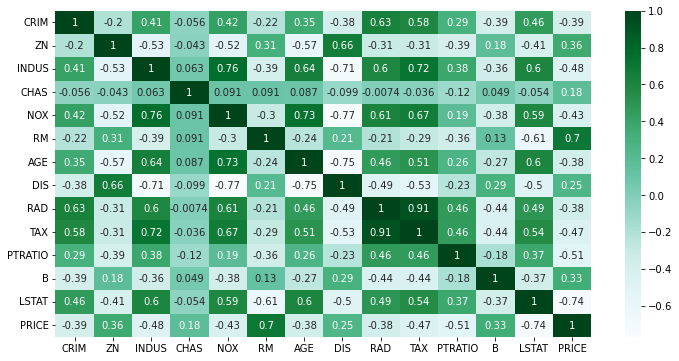

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),cmap='BuGn',annot=True)

<AxesSubplot:xlabel='LSTAT', ylabel='PRICE'>

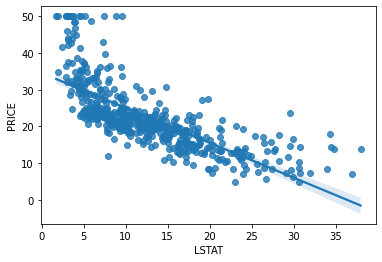

In [16]:
sns.regplot(y=data['PRICE'],x=data['LSTAT'])

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

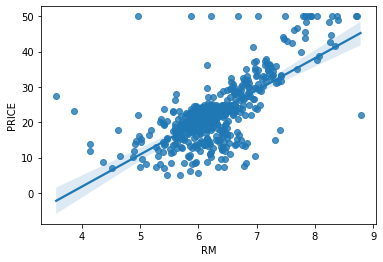

In [17]:
sns.regplot(y=data['PRICE'],x=data['RM'])

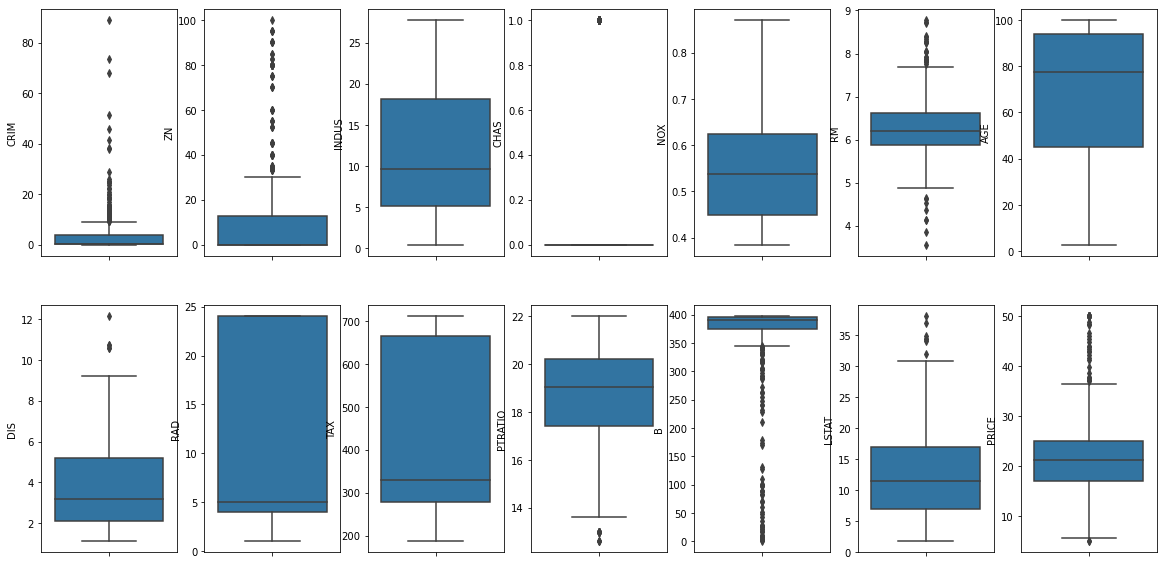

In [20]:

fig, axs=plt.subplots(ncols=7, nrows=2,figsize=(20,10))
index=0
axs = axs.flatten()

for col,value in data.items():
    sns.boxplot(y=col,data=data, ax=axs[index])
    index+=1

In [38]:
data['B'].describe()

count    325.000000
mean     335.845877
std      108.363646
min        0.320000
25%      350.450000
50%      385.020000
75%      392.520000
max      395.990000
Name: B, dtype: float64

In [39]:
data.drop(data[data['B']>396].index ,axis=0,inplace=True)

In [40]:
data.drop(data[data['B']<372].index ,axis=0,inplace=True)

In [41]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60,23.1
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4


In [43]:
data['CRIM'].describe()

count    218.000000
mean       1.778741
std        5.483647
min        0.019510
25%        0.095700
50%        0.212850
75%        0.744145
max       67.920800
Name: CRIM, dtype: float64

In [44]:
data.drop(data[data['CRIM']<0.019].index ,axis=0,inplace=True)
data.drop(data[data['CRIM']>0.75].index ,axis=0,inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60,23.1
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4


In [45]:
data['ZN'].describe()

count    163.000000
mean       5.987730
std       10.040497
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max       30.000000
Name: ZN, dtype: float64

In [46]:

data.drop(data[data['ZN']>12.5].index ,axis=0,inplace=True)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07,13.6
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391.0,19.2,393.29,17.60,23.1
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4


In [ ]:
#Linear regression

In [65]:
#spliting data for training and testing
X=data.drop(columns=['PRICE'],axis=1)
y=data['PRICE']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [66]:
x_train.shape

(52, 13)

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [68]:
model.fit(x_train,y_train)

LinearRegression()

In [69]:
y_predicted=model.predict(x_train)

In [71]:
model.score(x_train,y_train)

0.8224036419144465

In [ ]:
#Rndom forest regresssor

In [72]:
x= data.iloc[:,[-1,5,10,4,9]]
y= data.iloc[:,[-1]]

In [74]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train,y_train)

RandomForestRegressor()

In [80]:
y_pred=reg.predict(x_train)

In [83]:
reg.score(x_train,y_train)

0.9292248449210679

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeRegressor()
x =data.drop(columns=['RAD'], axis=1)
y =data['RAD']

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [94]:
# decision tree depth 2
model_dt_2 =DecisionTreeClassifier(random_state=1, max_depth=2)

model_dt_2.fit(x_train, y_train)

model_dt_2_trainscore =model_dt_2.score(x_train, y_train)

model_dt_2_testscore =model_dt_2.score(x_test, y_test)

print("Training Score", model_dt_2_trainscore)

print("Testing Score", model_dt_2_testscore)

Training Score 0.7115384615384616
Testing Score 0.7142857142857143


In [106]:
# decision tree depth 4
model_dt_4 =DecisionTreeClassifier(random_state=10, max_depth=4)

model_dt_4.fit(x_train, y_train)

model_dt_4_trainscore =model_dt_4.score(x_train, y_train)

model_dt_4_testscore =model_dt_4.score(x_test, y_test)

print("Training Score", model_dt_4_trainscore)

print("Testing Score", model_dt_4_testscore)

Training Score 0.9807692307692307
Testing Score 0.8571428571428571


In [107]:
# decision tree depth 6
model_dt_6 =DecisionTreeClassifier(random_state=10, max_depth=6)

model_dt_6.fit(x_train, y_train)

model_dt_6_trainscore =model_dt_6.score(x_train, y_train)

model_dt_6_testscore =model_dt_6.score(x_test, y_test)

print("Training Score", model_dt_6_trainscore)

print("Testing Score", model_dt_6_testscore)

Training Score 1.0
Testing Score 0.8571428571428571


In [111]:
#for checking overfitting and underfitting 
#test lesser..... train greater......data is overfitted
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from six import StringIO 
from IPython.display import Image
import pydotplus
from sklearn.tree import export_graphviz
from sklearn import metrics
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')



In [112]:
!conda install pydotplus -y

Solving environment: ...working... done

# All requested packages already installed.



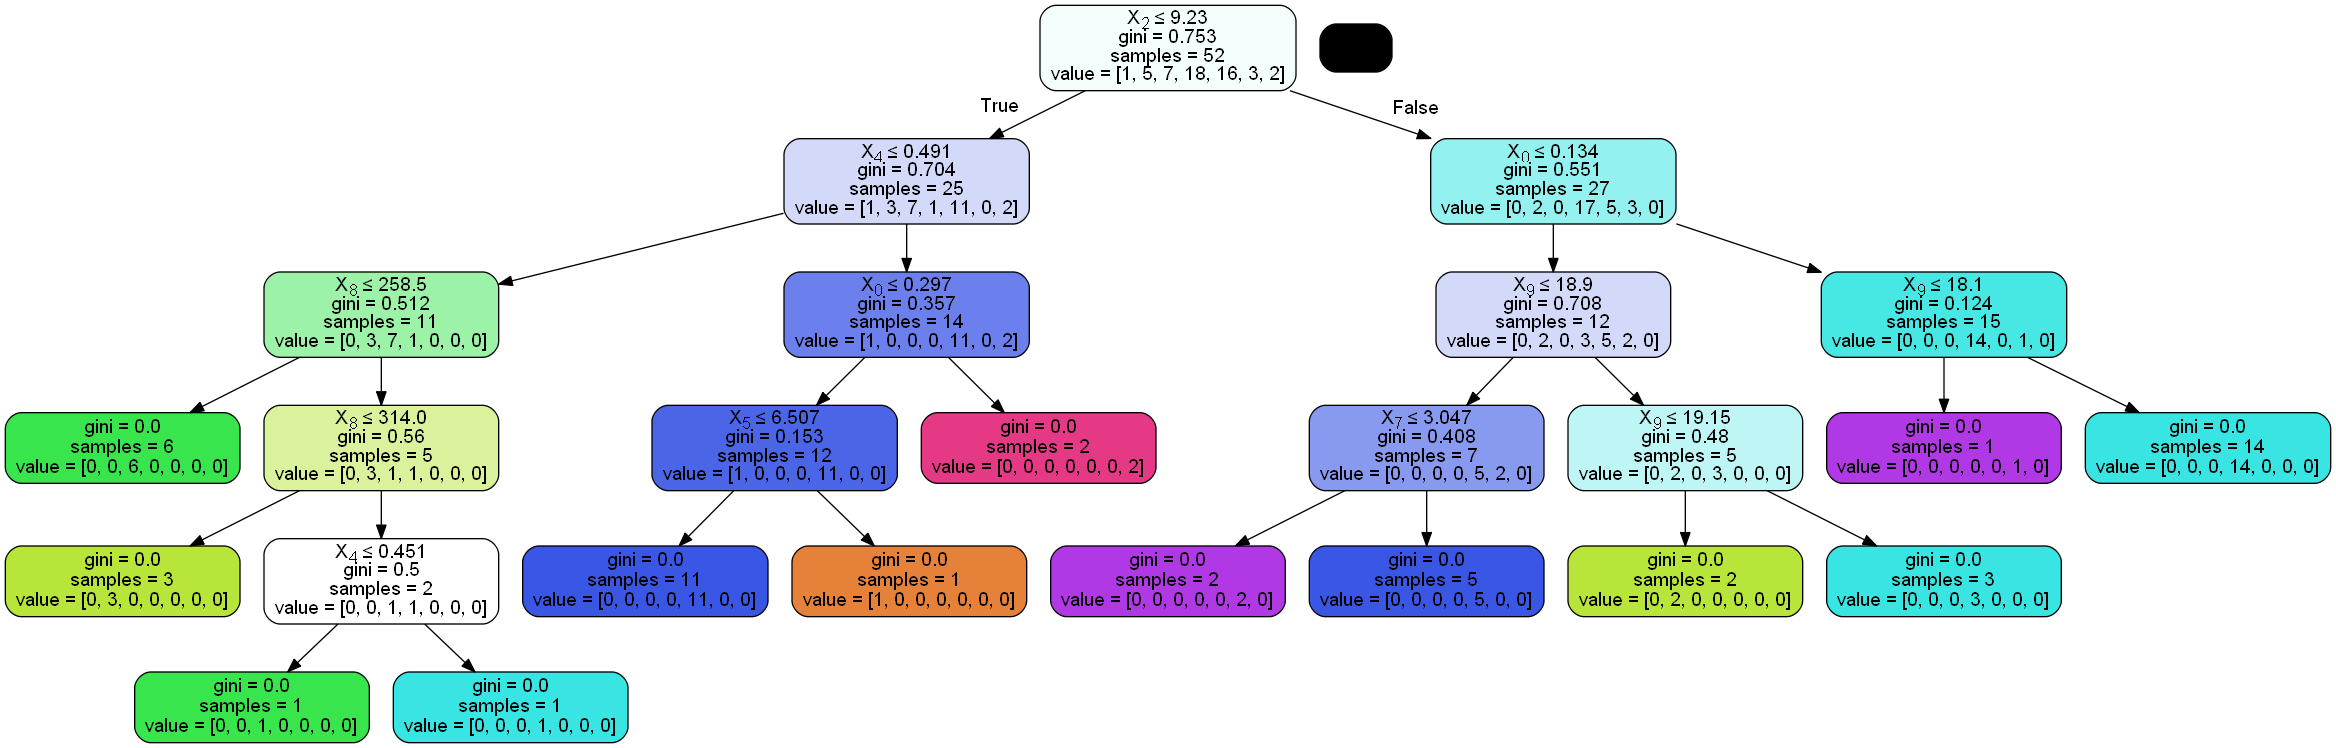

<Figure size 720x1440 with 0 Axes>

In [113]:
plt.figure(figsize=(10,20))
dot_data= StringIO()
export_graphviz(model_dt_6, out_file=dot_data, filled=True, rounded=True, special_characters=True) 
graph= pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())